In [1]:
import pandas as pd
import numpy as np
import cv2
import csv
import matplotlib.pyplot as plt
import mglearn
from sklearn.neural_network import MLPClassifier

In [2]:
red_image= cv2.imread('./red.png')
green_image= cv2.imread('./green.png')

coordinate = pd.read_csv('./coordinate.csv', header = None)
coordinate = coordinate.values

bgr = []
for i in range(0, 120, 1):
    tmp = red_image[coordinate[i][1], coordinate[i][0], :]
    tmp = np.delete(tmp, 0)
    bgr.append(np.append(tmp, 1))
    
    
    
for i in range(0, 120, 1):
    tmp = green_image[coordinate[i][1], coordinate[i][0], :]
    tmp = np.delete(tmp, 0)
    bgr.append(np.append(tmp, 0))


with open('./help_bgr.csv', 'w') as file:
    writer = csv.writer(file, lineterminator='\n')
    writer.writerows(bgr)

In [3]:
bgr_array = cv2.imread('./test.jpg')
answer = pd.read_csv('./test.csv', header = None)
answer = answer.values
answer_bgr = []
for i in range(11):
    tmp = bgr_array[answer[i][1], answer[i][0], :]
    tmp = np.delete(tmp, 0)       
    answer_bgr.append(np.append(tmp, 0))
for i in range(11,22):
    tmp = bgr_array[answer[i][1], answer[i][0], :]
    tmp = np.delete(tmp, 0) 
    answer_bgr.append(np.append(tmp, 1))

np.delete(answer_bgr, 0, axis=0)

with open('./answer_bgr.csv', 'w') as file:
    writer = csv.writer(file, lineterminator='\n')
    writer.writerows(answer_bgr)

In [4]:
data = pd.read_csv('./help_bgr.csv', header = None)
test = pd.read_csv('./answer_bgr.csv', header = None)
data = data.values
test = test.values
X_data = data[:,:-1]
y_data = data[:,-1]
X_test = test[:,:-1]
y_test = test[:,-1]

sum_train = 0
sum_test = 0
max_test = 0

for i in range(50):
    mlp = MLPClassifier(solver = "lbfgs", max_iter = 500, hidden_layer_sizes = [10]).fit(X_data, y_data)
    predict = mlp.predict(X_test)
    predict_sea = predict[0:11]
    predict_land = predict[11:]
    if max_test < mlp.score(X_test, y_test):
        max_test = mlp.score(X_test, y_test)
    sum_train += mlp.score(X_data, y_data)
    sum_test += mlp.score(X_test, y_test)

predict = mlp.predict(X_test)
predict_sea = predict[0:11]
predict_land = predict[11:]

print("予測結果 \n 紅葉ではない:{} \n 紅葉:{}".format(predict_sea, predict_land))
print("Accuracy on training set: {:.3f}".format(sum_train/50))
print("Accuracy on test set: {:.3f}".format(sum_test/50))
print("Max on training set: {:.3f}".format(max_test))
# print("F1 score: {:.4f}".format(f1_score(y_test, predict)))

/home/yattinda/.local/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


予測結果 
 紅葉ではない:[0 0 0 0 0 0 1 1 0 0 0] 
 紅葉:[0 0 1 0 1 1 1 0 1 1 1]
Accuracy on training set: 0.990
Accuracy on test set: 0.718
Max on training set: 0.818


In [5]:
product1_image= cv2.imread('./test.jpg')
data = pd.read_csv('./help_bgr.csv', header = None)
resize_image = cv2.resize(product1_image, (1920, 1080))
height, width, channels = resize_image.shape[:3]

product1_bgr = np.empty((0, 2))
for i in range(1, height, 5):
    for j in range(1, width, 5):
        tmp = np.array(resize_image[i, j, :])
        tmp = np.delete(tmp, 0)
        product1_bgr = np.append(product1_bgr, np.array([tmp]), axis = 0)
    
data = data.values

X_data = data[:,:-1]
y_data = data[:,-1]
X_test = product1_bgr
cell = int((width * height) / 25)

mlp = MLPClassifier(solver = "lbfgs", max_iter = 500, hidden_layer_sizes = [10]).fit(X_data, y_data)
predict = mlp.predict(X_test)
predict_sum = sum(predict)

forest_per = 1 - (predict_sum / cell)

print("紅葉の割合 {:.3f}%".format(forest_per * 100))

紅葉の割合 29.583%


In [6]:
train = pd.read_csv('./help_bgr.csv', header = None)
train = train.values

G = train[:,0]
R = train[:,1]

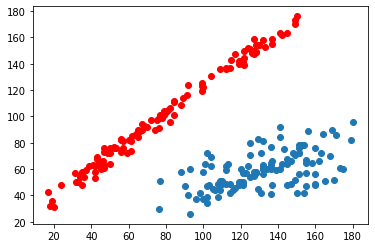

In [7]:
G_0 = G[:120]
G_1 = G[120:]
R_0 = R[:120]
R_1 = R[120:]
plt.scatter(R_0,G_0)
plt.scatter(R_1,G_1, c="red")

In [ ]:
red_image= cv2.imread('./red.png')
green_image= cv2.imread('./green.png')

coordinate = pd.read_csv('./coordinate.csv', header = None)
coordinate = coordinate.values

bgr = []
for i in range(0, 120, 1):
    tmp = red_image[coordinate[i][1], coordinate[i][0], :]
    bgr.append(np.append(tmp, 1))
    
    
    
for i in range(0, 120, 1):
    tmp = green_image[coordinate[i][1], coordinate[i][0], :]
    bgr.append(np.append(tmp, 0))


with open('./original_bgr.csv', 'w') as file:
    writer = csv.writer(file, lineterminator='\n')
    writer.writerows(bgr)